# Ejercicios Unidad 1

1. Elija una de las imágenes color que tomó para la clase y aplique separación de canales y elija un método para transformarla en escala de grises. Muestre por pantalla los resultados obtenidos.
2. Con las fotografías pedidas por la cátedra la clase pasada (la foto de objetos con fondo liso, y fotos del mismo producto en un contexto más complejo) usar los métodos de extracción de características (esos anteriores al Deep Learning) para encontrar la ubicación del producto dentro de la imagen.
3. Para leer un paper, conviene arrancar leyendo el abstract, luego hacer una lectura por los títulos de las distintas secciones, prestar atención a las imágenes y su texto asociado, y leer con detalle la conclusión.
    
    Se dividirá la comisión completa en 5 grupos de dialogo, cada grupo tomará un paper diferente de los que se muestran en la sección “Técnicas de extracción de características mediante aprendizaje profundo.” Les proponemos hacer una primera lectura del mismo. Luego de la misma un par de valientes del grupo dará una breve presentación de los mismos.
    
    [01_superpoint.pdf](https://drive.google.com/file/d/1tx6GrL1Cr-LnQBSH1K9xffPxbasQugE9/view?usp=drive_web)
    
    [02_d2net.pdf](https://drive.google.com/file/d/1-b07QhWcRdQWYhZxQ6wY97KN_Oiu1M8L/view?usp=drive_web)
    
    [03_NeurIPS.pdf](https://drive.google.com/file/d/1su2irZiTg1brgTUaAGxgUquHzZDzp_7d/view?usp=drive_web)
    
    [04_liu2018.pdf](https://drive.google.com/file/d/1IQT7nKAHXQD7opxk7ws-mLok7NGdXe09/view?usp=drive_web)
    
    [05_Zhang_Deep_Graphical_Feature_Learning.pdf](https://drive.google.com/file/d/15mFrmQvKmCFX_WeFNYfticSOrOKcKVTL/view?usp=drive_web)
    
4. Con los videos de [youtube.com](http://youtube.com) de cámara fija pedidos para esta clase, aplicar los algoritmos de detección de movimiento vistos en la teoría.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CV_Practicas/blob/main/Unidad_1_Ej_1.ipynb)

# 1) Canales

## Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imágenes

In [3]:
# Directorio de trabajo
file_dir = "/content/drive/MyDrive/UNR/5 - Proc de Imág y Visión Comp. (IA52)/Practicas/Unidad 1"
# file_dir = "/content/Unidad 1"

# Nombre de las imágenes
image1_name = "foto1.jpg"
image2_name = "foto2.jpg"

# Ruta completa de las imágenes
file_url1 = os.path.join(file_dir, image1_name)
file_url2 = os.path.join(file_dir, image2_name)

In [4]:
# Carga de las imágenes
image1 = cv.imread(file_url1)
image2 = cv.imread(file_url2)

In [5]:
# Convertir las imágenes a RGB
image1_rgb = cv.cvtColor(image1, cv.COLOR_BGR2RGB)
image2_rgb = cv.cvtColor(image2, cv.COLOR_BGR2RGB)

In [6]:
# Convertir la imagen a escala de grises
image1_gray = cv.cvtColor(image1, cv.COLOR_BGR2GRAY)
image2_gray = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

In [7]:
# Imprimir el shape y el tipo de dato del array de la imagen 1 original y en escala de grises
print("Datos de la Imagen 1: \n======================")
print(f"Shape de la imagen original (RGB): {image1_rgb.shape}")
print(f"Tipo de dato del array de la imagen original: {image1_rgb.dtype}")
print(f"Shape de la imagen en escala de grises: {image1_gray.shape}")
print(f"Tipo de dato del array de la imagen en escala de grises: {image1_gray.dtype}")

Datos de la Imagen 1: 
Shape de la imagen original (RGB): (841, 439, 3)
Tipo de dato del array de la imagen original: uint8
Shape de la imagen en escala de grises: (841, 439)
Tipo de dato del array de la imagen en escala de grises: uint8


## Espacios de colores

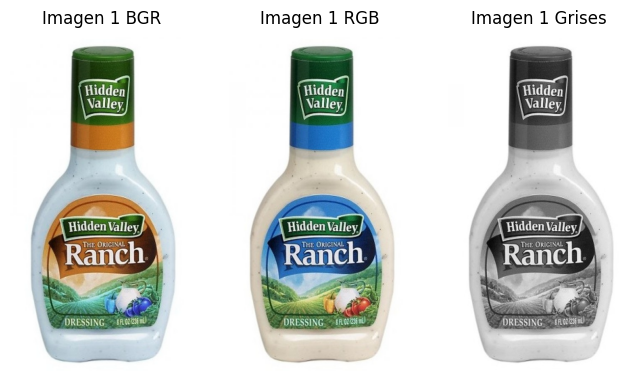

In [8]:
# Mostrar imagen 1 en diferentes espacios de color
plt.figure(figsize=(8,5))

# Imagen original BGR
plt.subplot(1, 3, 1)
plt.imshow(image1)
plt.title("Imagen 1 BGR")
plt.axis('off')

# Imagen original BGR
plt.subplot(1, 3, 2)
plt.imshow(image1_rgb)
plt.title("Imagen 1 RGB")
plt.axis('off')

# Imagen en escala de grises
plt.subplot(1, 3, 3)
plt.imshow(image1_gray, cmap='gray')
plt.title("Imagen 1 Grises")
plt.axis('off')

plt.show()

---

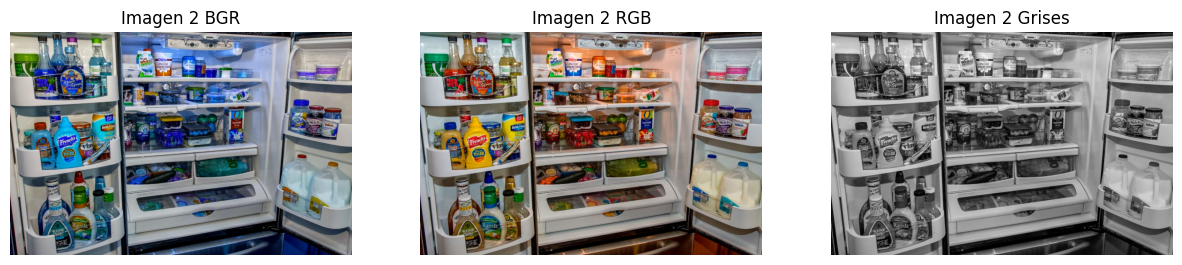

In [9]:
# Mostrar imagen 2 en diferentes espacios de color
plt.figure(figsize=(15,3))

# Imagen original BGR
plt.subplot(1, 3, 1)
plt.imshow(image2)
plt.title("Imagen 2 BGR")
plt.axis('off')

# Imagen original BGR
plt.subplot(1, 3, 2)
plt.imshow(image2_rgb)
plt.title("Imagen 2 RGB")
plt.axis('off')

# Imagen en escala de grises
plt.subplot(1, 3, 3)
plt.imshow(image2_gray, cmap='gray')
plt.title("Imagen 2 Grises")
plt.axis('off')

plt.show()

---

## Canales

In [10]:
# Descomponer la imagen1 en los canales R, G, B
R1, G1, B1 = image1_rgb[:,:,0], image1_rgb[:,:,1], image1_rgb[:,:,2]

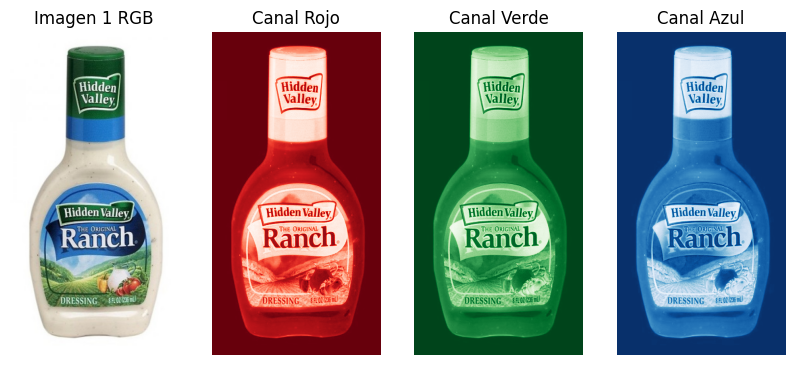

In [11]:
plt.figure(figsize=(10,5))

# Imagen original RGB
plt.subplot(1, 4, 1)
plt.imshow(image1_rgb)
plt.title("Imagen 1 RGB")
plt.axis('off')

# Canal Rojo
plt.subplot(1, 4, 2)
plt.imshow(R1, cmap='Reds')
plt.title("Canal Rojo")
plt.axis('off')

# Canal Verde
plt.subplot(1, 4, 3)
plt.imshow(G1, cmap='Greens')
plt.title("Canal Verde")
plt.axis('off')

# Canal Azul
plt.subplot(1, 4, 4)
plt.imshow(B1, cmap='Blues')
plt.title("Canal Azul")
plt.axis('off')

plt.show()

---